# Project 8: Machine Learning in Business

# Project Objective

The objective of this project was to analyze different regions for the development of oil wells and identify the most profitable region, while minimizing the risk of losses. We followed a detailed step-by-step approach, using linear regression for model predictions, and applied bootstrapping to evalute risks and potenital profits. 

# Project Description
You work for the OilyGiant mining company. Your task is to find the best place for a new well.
Steps to choose the location:
* Collect the oil well parameters in the selected region: oil quality and volume of reserves;
* Build a model for predicting the volume of reserves in the new wells;
* Pick the oil wells with the highest estimated values;
* Pick the region with the highest total profit for the selected oil wells.
You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

# Key Steps

1. Data Preparation and Exploration. 
2. Model Training and Evaluation.
3. Profit Calculation.
4. Risk and profit Evaluation. 

# Data Description
Geological exploration data for the three regions are stored in files:
* *geo_data_0.csv* 
* *geo_data_1.csv* 
* *geo_data_2.csv* 
* *id* — unique oil well identifier
* *f0, f1, f2* — three features of points (their specific meaning is unimportant, but the features themselves are significant)
product — volume of reserves in the oil well (thousand barrels).

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [9]:
# Provide the path to the CVS file: Relative Path 
# import the first dataset
geo_data_0_path = ('Downloads/geo_data_0.csv')
# import the second dataset
geo_data_1_path = ('Downloads/geo_data_1.csv')
# import the third dataset
geo_data_2_path = ('Downloads/geo_data_2.csv')

# 1 Download and prepare the data. Explain the procedure.

In [11]:
# Load the first dataset
geo_data_0 = pd.read_csv(geo_data_0_path)
# Load the second dataset
geo_data_1 = pd.read_csv(geo_data_1_path)
# Load the third dataset
geo_data_2 = pd.read_csv(geo_data_2_path)

In [12]:
# Preview the Data. Get a quick look at the first five rows of each dataset to understand its structure. 
# display the first dataset
display(geo_data_0.head(20))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [13]:
# Preview the Data. Get a quick look at the first five rows of each dataset to understand its structure. 
# display the third dataset
display(geo_data_1.head(20)) 

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [14]:
# Preview the Data. Get a quick look at the first five rows of each dataset to understand its structure. 
# display the third dataset
display(geo_data_2.head(20)) 

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [15]:
# Summary Statistics. Get a summary of each dataset to understand the distribution of the data. 
# display the first dataset
display(geo_data_0.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [16]:
median_product_0 = np.median(geo_data_0['product'])
print("Median of product in geo_data_0:", median_product_0)

Median of product in geo_data_0: 91.84997204396296


**Region 0:**
- Mean product volume: 92.5 thousand barrels, higher than the median, indicating a slightly right-skewed distribution.
- Standard Devitation: shows some variability in the product values. 
- Median product volume: 91.85 thousand barrels
- Product volume ranges from 0 to 185.36 thousand barrels

In [18]:
# Summary Statistics. Get a summary of each dataset to understand the distribution of the data. 
# display the second dataset
display(geo_data_1.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [19]:
median_product_1 = np.median(geo_data_1['product'])
print("Median of product in geo_data_1:", median_product_1)

Median of product in geo_data_1: 57.08562464628662


**Region 1:**
- Mean product volume: 68.83 thousand barrels, higher than the median, indicating a right-skewed distribution.
- Standard Deviation: indicates considerable variablity in the product values. 
- Median product volume: 57.09 thousand barrels
- Product volume ranges from 0 to 137.95 thousand barrels

In [21]:
# Summary Statistics. Get a summary of each dataset to understand the distribution of the data. 
# display the third dataset
display(geo_data_2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [22]:
median_product_2 = np.median(geo_data_2['product'])
print("Median of product in geo_data_2:", median_product_2)

Median of product in geo_data_2: 94.92561258990247


**Region 2:** 
- Mean product volume: 95.0 thousand barrels and is close to the median, indicating a roughly symmetric distribution.
- Standard devitation: shows some variability in the product values. 
- Median product volume: 94.93 thousand barrels
- Product volume ranges from 0 to 190.03 thousand barrels

**Summary of Findings**
*The mean values represents the average volume of reserves in the oil wells for each region. In geo_data_0, the average volume of reserves is approximately 92.50 thousand barrels. This analysis of the mean value is crucial for gauging the central tendency of the data.*

- **geo_data_2** has the highest mean value, suggesting it might be the most promising region in terms of average reserves.
- **geo_data_1** has the lowset mean value, indicating it might be less promising on average compared to the other regions.
- 
*The minimum values indicates the lowest volume of reserves found in the oil wells for each region. A value of 0.00 means there are wells with no reserves at all in each dataset.*

*The maximum value indicates the highest volume of reserves found in the oil wells for each region. This shows the potential upper limit of reserves.*

**Note:** The wide range between the minimum and maximum values in all datasets shows significant variability in the volume of reserves within each region.  The high maximum values in **geo_data_0** and **geo_data_2** suggest the potential for some wells to have very high reserves.

In [26]:
# Check for Missing Values: Identify if there are any missing values that might need to be handled
# display the first dataset
display(geo_data_0.isnull().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [27]:
# Check for Missing Values: Identify if there are any missing values that might need to be handled
# display the second dataset
display(geo_data_1.isnull().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [28]:
# Check for Missing Values: Identify if there are any missing values that might need to be handled
# display the third dataset
display(geo_data_2.isnull().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

**Missing Values - Summary of Findings:**
- Dataset 1 (geo_data_0): No missing values.
- Dataset 2 (geo_data_1): No missing values.
- Dataset 3 (geo_data_2): No missing values.

In [30]:
# Column Names. Check the column names to ensure they are what is expected f0, f1, f2
# display the first dataset
display(geo_data_0.columns)

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

In [31]:
# Column Names. Check the column names to ensure they are what is expected f0, f1, f2
# display the second dataset
display(geo_data_1.columns)

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

In [32]:
# Column Names. Check the column names to ensure they are what is expected f0, f1, f2
# display the third dataset
display(geo_data_2.columns)

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

In [33]:
# Features Scaling
# Drop the 'id' column
geo_data_0 = geo_data_0.drop(columns=['id']) 
geo_data_1 = geo_data_1.drop(columns=['id']) 
geo_data_2 = geo_data_2.drop(columns=['id'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale features for geo_data_0
geo_data_0[['f0', 'f1', 'f2']] = scaler.fit_transform(geo_data_0[['f0', 'f1', 'f2']])

# Scale features for geo_data_1
geo_data_1[['f0', 'f1', 'f2']] = scaler.fit_transform(geo_data_1[['f0', 'f1', 'f2']])

# Scale features for geo_data_2
geo_data_2[['f0', 'f1', 'f2']] = scaler.fit_transform(geo_data_2[['f0', 'f1', 'f2']])


**Handling Outliers and Analysis**

Identifying and visualizing outliers.  Outliers can significantly impact the analysis and model performance, let's proceed to detection and handling any outliers, if any.  Data visualization of boxplots to compare the distribution of oil reserves across multiple regions and identify outliers. 

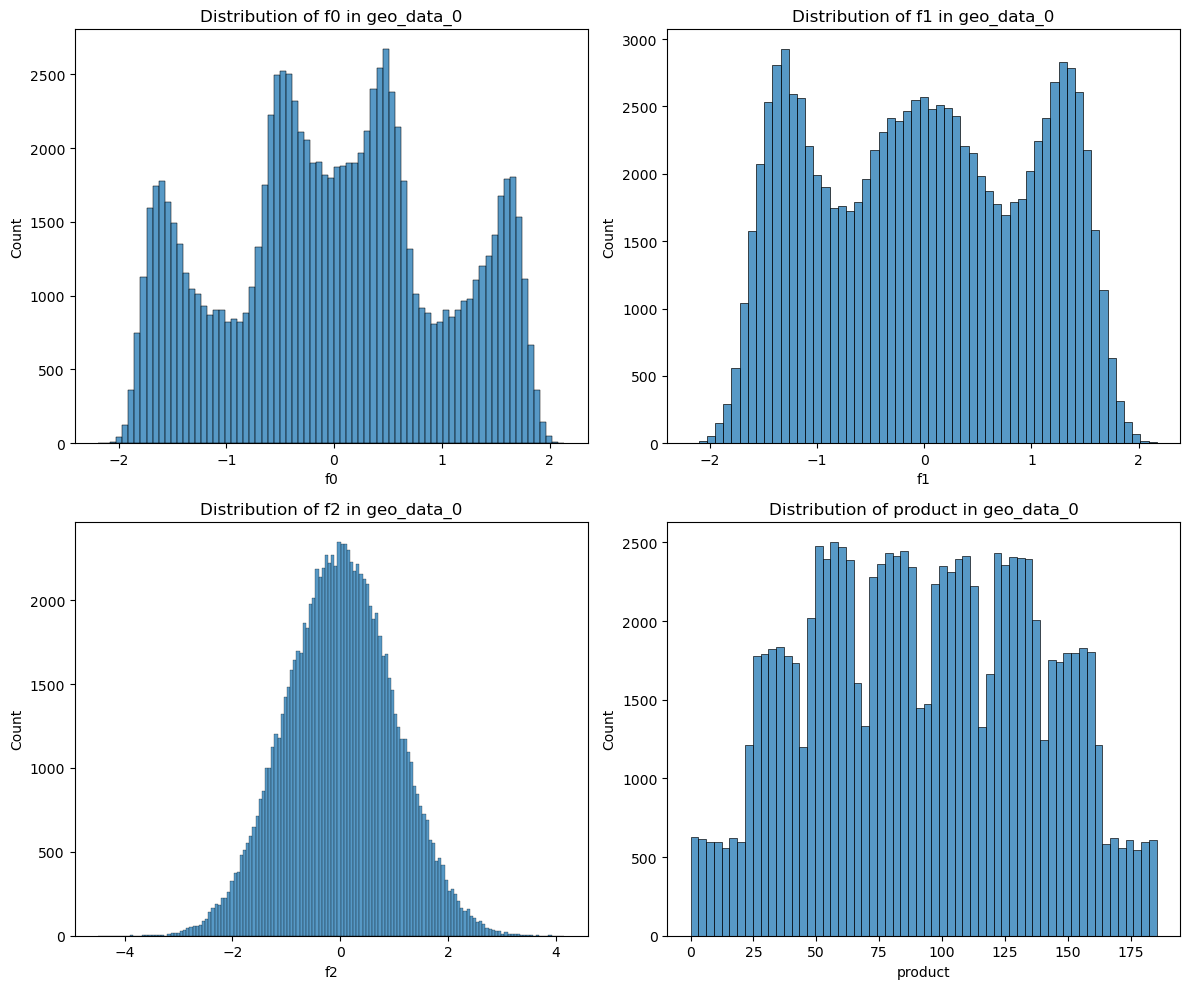

In [35]:
# Visualize the distributions of features in geo_data_0
fig, axes = plt.subplots(2,2, figsize=(12, 10))

sns.histplot(geo_data_0['f0'], ax=axes[0, 0])
axes[0, 0].set_title('Distribution of f0 in geo_data_0')

sns.histplot(geo_data_0['f1'], ax=axes[0, 1])
axes[0, 1].set_title('Distribution of f1 in geo_data_0')

sns.histplot(geo_data_0['f2'], ax=axes[1, 0])
axes[1, 0].set_title('Distribution of f2 in geo_data_0')

sns.histplot(geo_data_0['product'], ax=axes[1, 1])
axes[1, 1].set_title('Distribution of product in geo_data_0')

plt.tight_layout()
plt.show()
                    

**Distribution of f0 in geo_data_0:** Range from approximatey -2.5 to 2.5. It appears to be multimodal (multiple peaks) with several peaks, indicating that there may be multiple underlying distributions or clusters within this feature. 

**Distribution of f1 in geo_data_0:** Range from approximatey -2.5 to 2.5. Similar to f0, it shows a multimodal pattern with several peaks, suggesting possible mutliple clusters or groups in the data. 

**Distribution of f2 in geo_data_0:** Range from approximatey -4 to 4. The distribution is unimodal and resembles a normal distribution, indicating that this feature is likely to have a more consistent and central tendency compared to f0 and f1. 

**Distribution of 'product' in geo_data_0:** The distribution of 'product' (volume of reserves) ranges from approximately 0 to 175. The distribution is multimodal with several peaks, suggesting that there might be different groups or types of oil wells with varying volumes of reserves. 

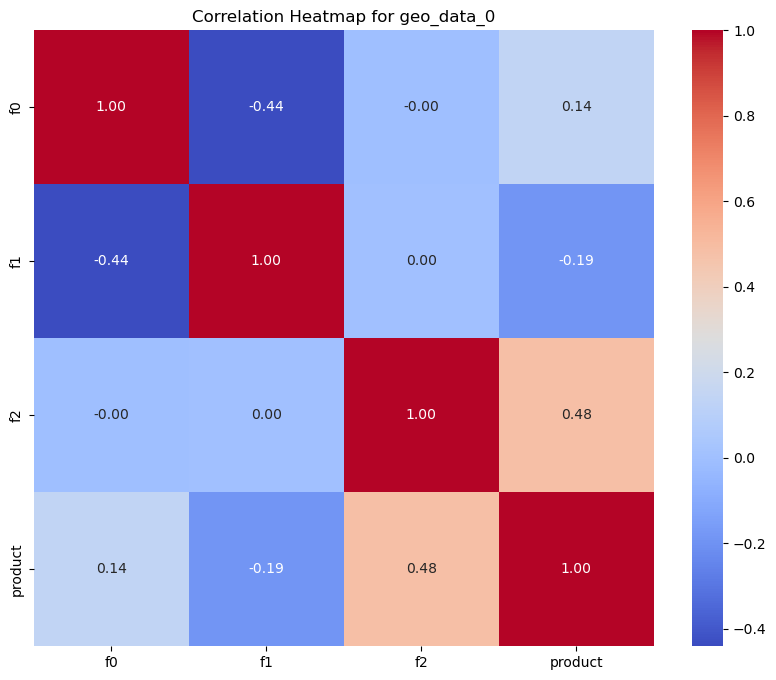

In [37]:
# Feature Exploration
# Correlation heatmap for geo_data_0
plt.figure(figsize=(10, 8))
sns.heatmap(geo_data_0.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for geo_data_0')
plt.show()


**Correlation Heatmap in geo_data_0 - Key Takeaways**

- The strongest relationship with 'product' is observed with f2. This feature will likely play an important role in predicting the volume of reserves.
- The features f0 and f1 have weaker relationships with 'product', suggesting they might be less influential in the prediction model.
- There is a moderate negative correlation between f0 and f1, which might indicate some level of redundancy or inverse relationship between these features. 

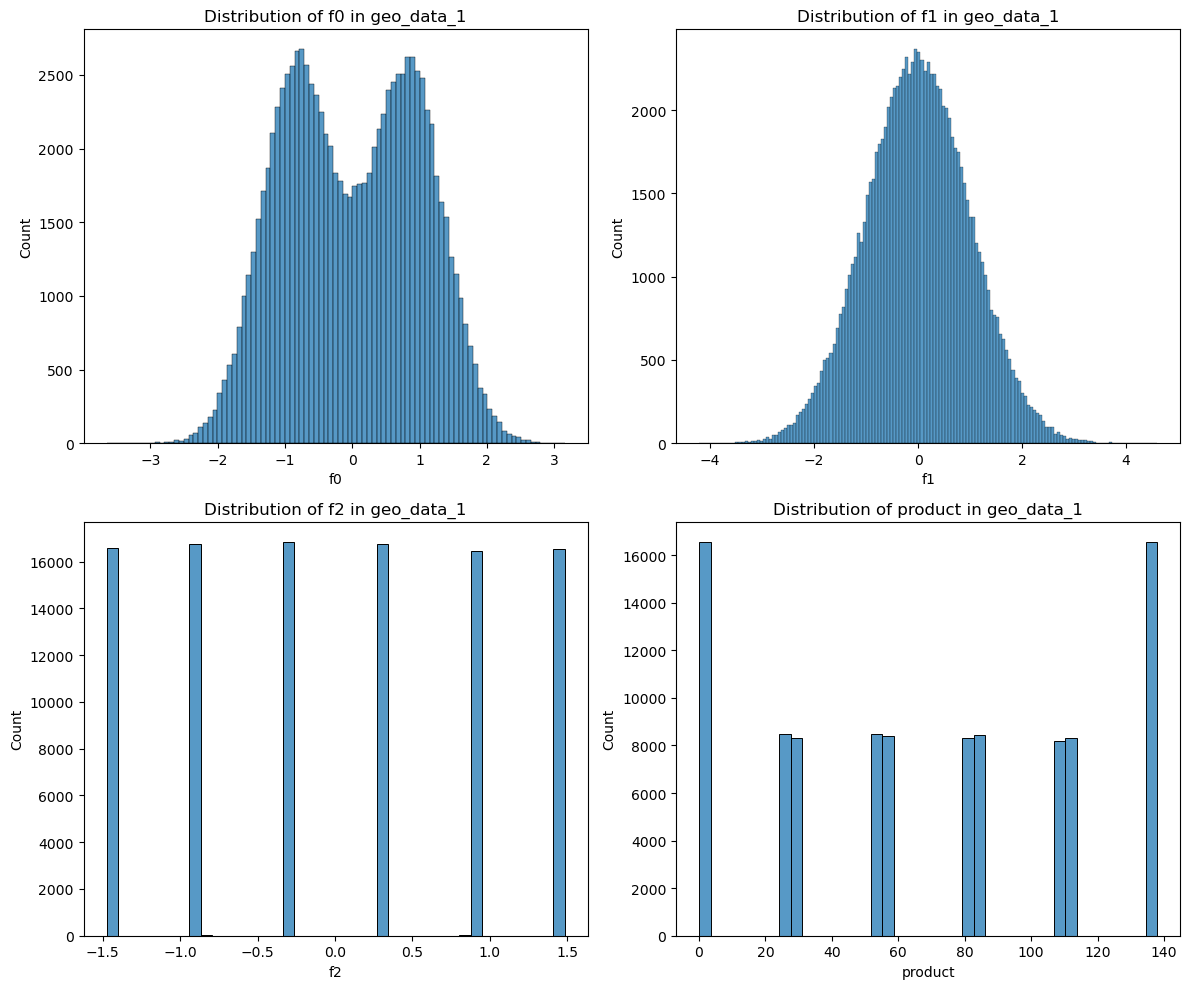

In [39]:
# Visualize the distributions of features in geo_data_1
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(geo_data_1['f0'], ax=axes[0, 0])
axes[0, 0].set_title('Distribution of f0 in geo_data_1')

sns.histplot(geo_data_1['f1'], ax=axes[0, 1])
axes[0, 1].set_title('Distribution of f1 in geo_data_1')

sns.histplot(geo_data_1['f2'], ax=axes[1, 0])
axes[1, 0].set_title('Distribution of f2 in geo_data_1')

sns.histplot(geo_data_1['product'], ax=axes[1, 1])
axes[1, 1].set_title('Distribution of product in geo_data_1')

plt.tight_layout()
plt.show()


**Distribution of f0 in geo_data_1:** Range from approximatey -1 to 1. The distribution appears to be bimodal, with two peaks, this indicates that there may be two underlying groups or clusters within this feature.

**Distribution of f1 in geo_data_1:** Range from approximatey normal, centered around 0. This suggests that f1 follows a more consistent pattern with a central tendency. 

**Distribution of f2 in geo_data_1:** Range from approximatey -1.5 to 1.5. TThe distribution is uniform, with equal counts for values at regular intervals. This indicates a more even spread of values for f2 without a clear central tendency. 

**Distribution of 'product' in geo_data_1:** The distribution of 'product' (volume of reserves) is also uniform, with equal counts for values at regular intervals between 0 and 140. This suggests that the volume of reserves is evenly distributed across different values. 

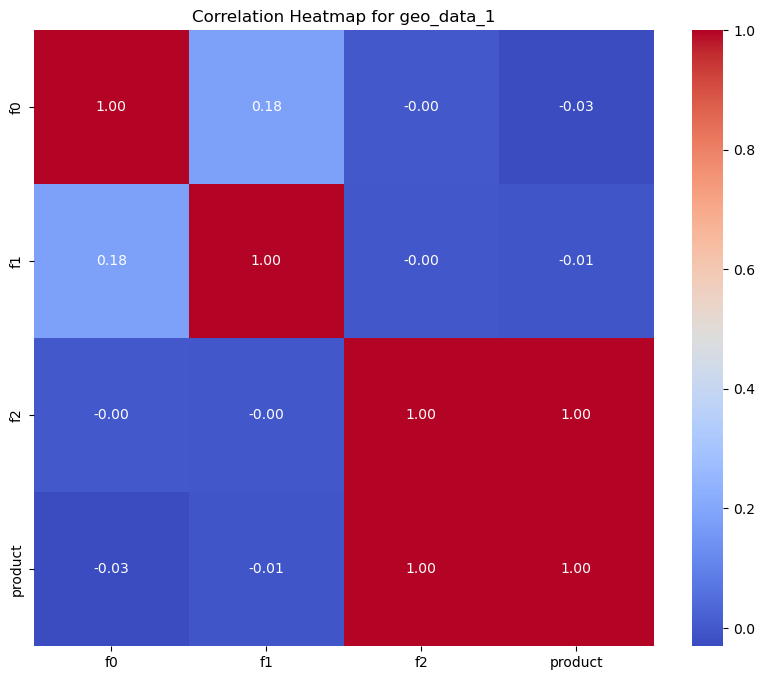

In [41]:
# Correlation heatmap for geo_data_1
plt.figure(figsize=(10, 8))
sns.heatmap(geo_data_1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for geo_data_1')
plt.show()


**Correlation Heatmap in geo_data_1 - Key Takeaways**

- The feature f2 is the most significant feature for predicting the volume of reserves (product), with a perfect positive correlation. 
- The features f0 and f1 have very weak correlations with product, suggesting they may have limited predictive poewr for the target variable. 

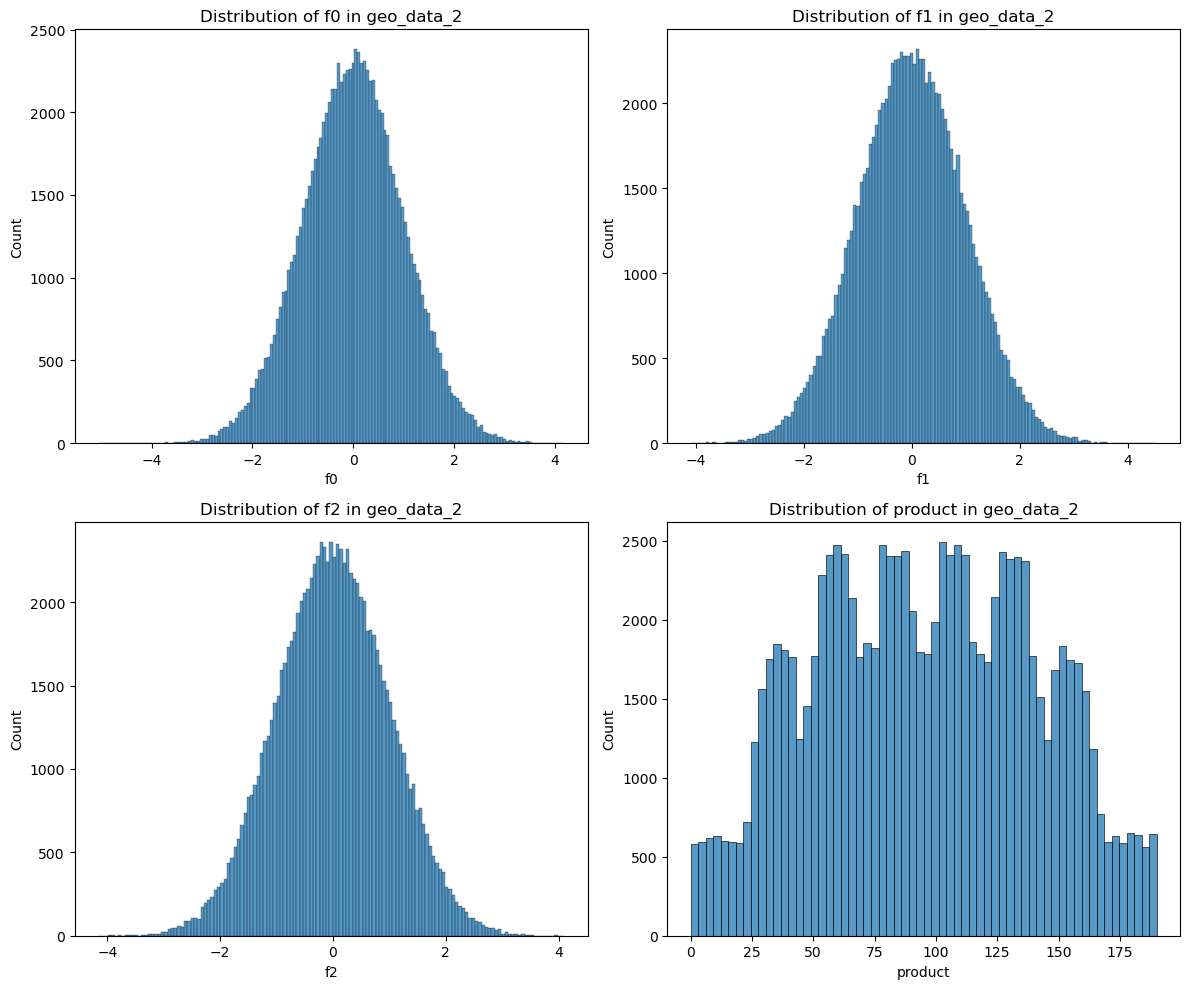

In [43]:
# Visualize the distributions of features in geo_data_2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(geo_data_2['f0'], ax=axes[0, 0])
axes[0, 0].set_title('Distribution of f0 in geo_data_2')

sns.histplot(geo_data_2['f1'], ax=axes[0, 1])
axes[0, 1].set_title('Distribution of f1 in geo_data_2')

sns.histplot(geo_data_2['f2'], ax=axes[1, 0])
axes[1, 0].set_title('Distribution of f2 in geo_data_2')

sns.histplot(geo_data_2['product'], ax=axes[1, 1])
axes[1, 1].set_title('Distribution of product in geo_data_2')

plt.tight_layout()
plt.show()


**Distribution of f0 in geo_data_2:** Range from approximatey -4 to 4, indicating a balanced spread around the mean.  The distribution appears to be approximately normal, centered around 0. 

**Distribution of f1 in geo_data_2:** Range from approximatey -4 to 4. Similiar to f0, the distribution of f1 is approximately normal and centered around 0. 

**Distribution of f2 in geo_data_2:** Range from approximatey -4 to 4.  The distribution of f2 is also approximately normal and centered around 0. The majority of the values lies between -4 to 4 suggesting a consistent pattern. 

**Distribution of 'product' in geo_data_2:** The distribution of product (volume of reserves) is more irregular compared to the other features. It has multiple peaks and ranges from 0 to around 175, indicating variability in the volume of reserves. 

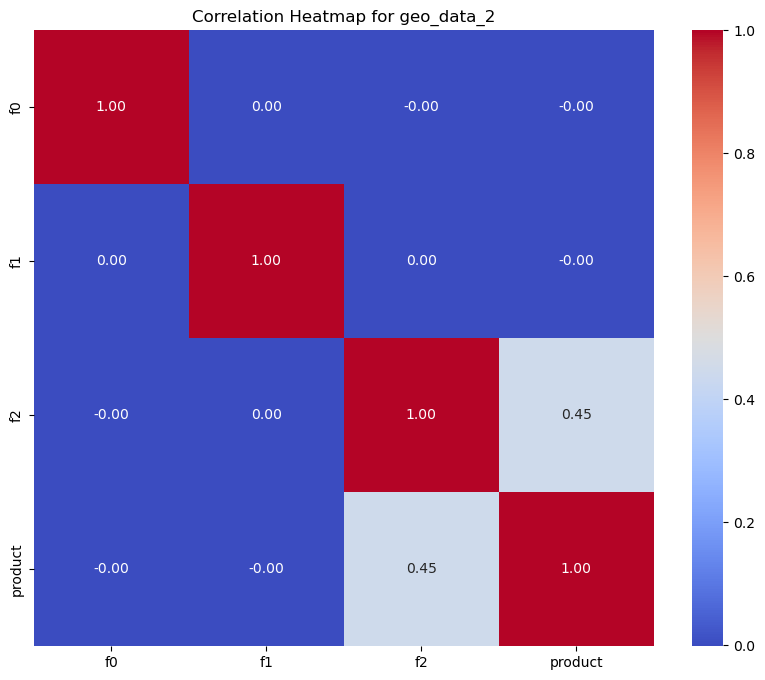

In [45]:
# Correlation heatmap for geo_data_2
plt.figure(figsize=(10, 8))
sns.heatmap(geo_data_2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for geo_data_2')
plt.show()


**Correlation Heatmap in geo_data_2 - Key Takeaways**

- The feature f2 is the most significant feature for predicting the volume of reserves (product), with a moderate positive correlation. 
- The features f0 and f1 have no significant correlations with product, suggesting they may have limited predictive power for the target variable. 

# 2. Train and Test the Model for Each Region

In [49]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [50]:
def train_and_evaluate(data): 
    X = data[['f0', 'f1', 'f2']] 
    y = data['product']
    # 2.1. Split the data into a training set and validation set at a ratio of 75:25.
    # Split the data 
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
    # 2.2. Train the model and make predictions for the validation set.
    # Train the model 
    model = LinearRegression() 
    model.fit(X_train, y_train) 
    # Make predictions 
    y_pred = model.predict(X_val)
    # 2.3. Save the predictions and correct answers for the validation set.
    # Save predictions and correct answers 
    predictions = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
    # Calculate the average volume of predicted reserves 
    avg_predicted_reserves = y_pred.mean()
    # 2.4. Print the average volume of predicted reserves and model RMSE.
    # Calculate the RMSE 
    rmse = root_mean_squared_error(y_val, y_pred)
    
    return avg_predicted_reserves, rmse, predictions

In [51]:
# constants

In [52]:
# Train and evaluate models for each region
avg_predicted_0, rmse_0, predictions_0 = train_and_evaluate(geo_data_0)
avg_predicted_1, rmse_1, predictions_1 = train_and_evaluate(geo_data_1)
avg_predicted_2, rmse_2, predictions_2 = train_and_evaluate(geo_data_2)

In [53]:
# Display results
display(f'Region 0 - Average Predicted Reserves: {avg_predicted_0:.2f}, RMSE: {rmse_0:.2f}') 
display(f'Region 1 - Average Predicted Reserves: {avg_predicted_1:.2f}, RMSE: {rmse_1:.2f}') 
display(f'Region 2 - Average Predicted Reserves: {avg_predicted_2:.2f}, RMSE: {rmse_2:.2f}')

'Region 0 - Average Predicted Reserves: 92.40, RMSE: 37.76'

'Region 1 - Average Predicted Reserves: 68.71, RMSE: 0.89'

'Region 2 - Average Predicted Reserves: 94.77, RMSE: 40.15'

##### 2.5. Analyze the results.

**Region 0:**
- **Average Predicted Reserves:** 92.40 thousand barrels.
- **RMSE:** 37.76
This indicates a good prediction with some variation, as indicated by the RMSE value. The Root Mean Square Error of 37.76 suggests that, on average, the model's predictions deviate from the actual reserves by a significant margin. This is a relativly high error, indicating the model may not be very accurate in this region. 

**Region 1:**
- **Average Predicted Reserves:** 68.71 thousand barrels.
- **RMSE:** 0.89
The model predictions are very close to the actual values, given the low RMSE value. However, the average predicted reserves are lower compared to other regions. An RMSE of 0.89 is extremely low, indicating that the model performs well in Region 1, with minimal prediction errors. This suggest high confidence in the model's accuracy for this region.  *The model performs exceptionally well in Region 1 (low RMSE), but struggles in Region 0 and Region 2 (high RMSE).*

**Region 2:**
- **Average Predicted Reserves:** 94.77 thousand barrels.
- **RMSE:** 40.15
The highest average predicted reserves among the three regions, but a with a higher RMSE indicating more variability. The RMSE of 40.15 is relatively high, indicating substantial devitations between predicted and actual reserves. Simliar to Region 0, this suggests the model is not performing well in Region 2.

# 3. Prepare for profit calculation:

In [57]:
# 3.1. Store all key values for calculations in separate variables.
# Constants
budget = 100_000_000 # 100 million USD
cost_per_well = budget / 200 # Cost per well
revenue_per_barrel = 4.5 # Revenue per barrel
num_wells = 200 # number of wells
cost_per_barrel = cost_per_well / revenue_per_barrel # Cost per barrel
n_bootstraps = 1000 # number of boostrap samples

In [58]:
# Print key values
print(f'Budget: {budget} USD')
print(f'Cost per well: {cost_per_well} USD')
print(f'Revenue per barrel: {revenue_per_barrel} USD')
print(f'Number of wells: {num_wells} ')
print(f'Number of boostrap samples: {n_bootstraps}')

Budget: 100000000 USD
Cost per well: 500000.0 USD
Revenue per barrel: 4.5 USD
Number of wells: 200 
Number of boostrap samples: 1000


##### 3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

In [61]:
# calculate the volume of reserves sufficient for no losses
volume_for_no_losses = cost_per_well / (revenue_per_barrel * 1000) # in thousand barrels

In [62]:
# print the calculated volume
print(f'Volume of reserves sufficient for no losses: {volume_for_no_losses:.2f} thousand barrels')

Volume of reserves sufficient for no losses: 111.11 thousand barrels


In [63]:
# Average predicted reserves for each region. 
avg_predicted_reserves_0 = 92.40
avg_predicted_reserves_1 = 68.71
avg_predicted_reserves_2 = 94.77

In [64]:
# print comparisons
print(f'Region 0 - Average Predicted Reserves: {avg_predicted_reserves_0:.2f} thousand barrels') 
print(f'Region 1 - Average Predicted Reserves: {avg_predicted_reserves_1:.2f} thousand barrels') 
print(f'Region 2 - Average Predicted Reserves: {avg_predicted_reserves_2:.2f} thousand barrels')

Region 0 - Average Predicted Reserves: 92.40 thousand barrels
Region 1 - Average Predicted Reserves: 68.71 thousand barrels
Region 2 - Average Predicted Reserves: 94.77 thousand barrels


In [65]:
# check if average reserves exceed the break-even volume
print(f'Region 0 - Exceeds break-even volume: {avg_predicted_reserves_0 > volume_for_no_losses}')
print(f'Region 1 - Exceeds break-even volume: {avg_predicted_reserves_1 > volume_for_no_losses}')
print(f'Region 2 - Exceeds break-even volume: {avg_predicted_reserves_2 > volume_for_no_losses}')

Region 0 - Exceeds break-even volume: False
Region 1 - Exceeds break-even volume: False
Region 2 - Exceeds break-even volume: False


##### 3.3. Provide the findings about the preparation for profit calculation step.

**Volume of Reserves Sufficient for No Losses**
The calculated volume of reserves sufficient for no losses is: **111.11 thousand barrels**.
This value represents the break-even point where the revenue from the reserves equals the cost of developing a new well. 

**Average Predicted Reserves for Each Region**
- **Region 0**: 92.40 thousand barrels
- **Region 1**: 68.71 thousand barrels
- **Region 2**: 94.77 thousand barrels

**Comparison with the Break-Even Volume**
- **Region 0**: The average predicted reserves (92.40) do not exceed the break-even volume (111.11). Therefore, the development of new wells in Region 0 is not profitable under the given conditions. 
- **Region 1**: The average predicted reserves (68.71) do not exceed the break-even volume (111.11). Therefore, the development of new wells in Region 1 is also not profitable under the given conditions. 
- **Region 2**: The average predicted reserves (94.77) do not exceed the break-even volume (111.11). Therefore, the development of new wells in Region 2 is not profitable under the given conditions.

**Findings**
None of the regions have average predicted reserves that exceed the volume required for no losses. This suggests that under the current conditions, developing new wells in any of the these regions may not be profitable. 

# 4. Write a function to calculate profit from a set of selected oil wells and model predictions:

##### 4.1. Pick the wells with the highest values of predictions.

In [71]:
# Store the actual target values and predictions from the validation set
validation_target_0 = predictions_0['Actual']
validation_target_1 = predictions_1['Actual']
validation_target_2 = predictions_2['Actual']

In [72]:
display(validation_target_0)

75721    122.073350
80184     48.738540
19864    131.338088
76699     88.327757
92991     36.959266
            ...    
21271    148.821520
34014    123.454003
81355     91.945213
65720    149.295563
11627     57.244039
Name: Actual, Length: 25000, dtype: float64

In [73]:
display(validation_target_1)

75721      0.000000
80184     53.906522
19864    134.766305
76699    107.813044
92991      0.000000
            ...    
21271    107.813044
34014     53.906522
81355     26.953261
65720    110.992147
11627    134.766305
Name: Actual, Length: 25000, dtype: float64

In [74]:
display(validation_target_2)

75721    117.441301
80184     47.841249
19864     45.883483
76699    139.014608
92991     84.004276
            ...    
21271     40.797226
34014     87.144239
81355     52.039812
65720    136.961454
11627    109.173206
Name: Actual, Length: 25000, dtype: float64

In [75]:
# Define the calculate_profit function
def calculate_profit(target, predictions, budget, cost_per_well, revenue_per_barrel, num_wells):
    # sort the predictions in descending order
    predictions_sorted = predictions.sort_values(by='Predicted', ascending=False)
    # select the top 'num_wells' wells using predictions
    selected_indices = predictions_sorted.index[:num_wells]
    selected_targets = target.loc[selected_indices]
    # calculate total volume of reserves based on the corresponding target values
    total_volume_of_reserves = selected_targets.sum()
    # calculate total revenue
    total_revenue = total_volume_of_reserves * revenue_per_barrel * 1000  # Converting to barrels
    # calculate total cost
    total_cost = cost_per_well * num_wells
   # calculate profit
    profit = total_revenue - total_cost    
    return total_volume_of_reserves, profit

In [76]:
# Train and evaluate models for each region
avg_predicted_0, rmse_0, predictions_0 = train_and_evaluate(geo_data_0)
avg_predicted_1, rmse_1, predictions_1 = train_and_evaluate(geo_data_1)
avg_predicted_2, rmse_2, predictions_2 = train_and_evaluate(geo_data_2)

In [77]:
# Display training and evaluation results
print(f'Region 0 - Average Predicted Reserves: {avg_predicted_0:.2f}, RMSE: {rmse_0:.2f}') 
print(f'Region 1 - Average Predicted Reserves: {avg_predicted_1:.2f}, RMSE: {rmse_1:.2f}') 
print(f'Region 2 - Average Predicted Reserves: {avg_predicted_2:.2f}, RMSE: {rmse_2:.2f}')

Region 0 - Average Predicted Reserves: 92.40, RMSE: 37.76
Region 1 - Average Predicted Reserves: 68.71, RMSE: 0.89
Region 2 - Average Predicted Reserves: 94.77, RMSE: 40.15


In [78]:
# Calculate profit for each region
total_volume_0, profit_0 = calculate_profit(validation_target_0, predictions_0, budget, cost_per_well, revenue_per_barrel, num_wells)
total_volume_1, profit_1 = calculate_profit(validation_target_1, predictions_1, budget, cost_per_well, revenue_per_barrel, num_wells)
total_volume_2, profit_2 = calculate_profit(validation_target_2, predictions_2, budget, cost_per_well, revenue_per_barrel, num_wells)

In [79]:
# Display profit calculation results
print(f'Region 0 - Total Volume of Reserves: {total_volume_0:.2f} thousand barrels, Profit: {profit_0:.2f} USD')
print(f'Region 1 - Total Volume of Reserves: {total_volume_1:.2f} thousand barrels, Profit: {profit_1:.2f} USD')
print(f'Region 2 - Total Volume of Reserves: {total_volume_2:.2f} thousand barrels, Profit: {profit_2:.2f} USD')

Region 0 - Total Volume of Reserves: 29686.98 thousand barrels, Profit: 33591411.14 USD
Region 1 - Total Volume of Reserves: 27589.08 thousand barrels, Profit: 24150866.97 USD
Region 2 - Total Volume of Reserves: 27996.83 thousand barrels, Profit: 25985717.59 USD


##### 4.2. Summarize the target volume of reserves in accordance with these predictions

**Findings and Analysis**

**Training and evaluation results:**
- **Region 0**: The RMSE is approximately 40.9% of the average predicted reserves (37.76 / 92.40).  This indicates significant variabliity or error in the predictions. The predicted reserves might not be very reliable. 
- **Region 1**: The RMSE is approximately 1.3% of the average predicted reserves (0.89 / 68.71).  This implies very accurate predictions for Region 1, with minimal errors. The model performs excellently for this region.
- **Region 2**: The RMSE is approximately 42.4% of the average predicted reserves (40.15 / 94.77).  This suggests that the model struggles to make accurate predictions for this region, simliar to Region 0.

**Display profit calculation results:**
- **Region 0**: This region has the *highest profit* among the three. The *total volume of reserves* is substantial, contributing to a significant profit.  
- **Region 1**: Although this region has the *lowest average* predicted reserves, it still generates a notable profit. However, the *profit is lower* compared to Regions 0 and 2. 
- **Region 2**: This region has a *total volume of reserves* and *profit* slightly *higher* than Region 1 but lower than Region 0.

##### 4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

**Suggested Region for Oil Wells' Development and Justification for Choice**
**Region 0:** is recommended for the development of oil wells based on the following key points: 

**Justification of the Choice**
**Highest Average Profit:**
- Region 0: Average Profit: 33,591,411.14
- Region 1: Average Profit: 24,150,866.97
- Region 2: Average Profit: $25,985,717.59

*Region 0 has the highest average profit among the three regions.*


**Volume of Reserves:**
- Region 0: Total Volume of Reserves: 29,686.98 thousand barrels
- Region 1: Total Volume of Reserves: 27,589.08 thousand barrels
- Region 2: Total Volume of Reserves: 27,996.83 thousand barrels

*Region 0 also leads in the total volume of reserves, which is a crucial metric for long-term viability.*


# 5. Calculate risks and profit for each region:

##### 5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.

In [95]:
# Define the bootstrap_profit function
def bootstrap_profit(target, predictions, budget, cost_per_well, revenue_per_barrel, num_wells, n_bootstraps=1000):
    profits = []
    for _ in range(n_bootstraps):
        sample_indices = np.random.choice(predictions.index, size=500, replace=True)
        sample_predictions = predictions.loc[sample_indices]
        sample_target = target.loc[sample_indices]
        _, profit = calculate_profit(sample_target, sample_predictions, budget, cost_per_well, revenue_per_barrel, num_wells)
        profits.append(profit)
    return np.array(profits)

In [96]:
# Bootstrap profit distributions for each region
profits_0 = bootstrap_profit(validation_target_0, predictions_0, budget, cost_per_well, revenue_per_barrel, num_wells, n_bootstraps)
profits_1 = bootstrap_profit(validation_target_1, predictions_1, budget, cost_per_well, revenue_per_barrel, num_wells, n_bootstraps)
profits_2 = bootstrap_profit(validation_target_2, predictions_2, budget, cost_per_well, revenue_per_barrel, num_wells, n_bootstraps)

##### 5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

In [99]:
# Define the calculate_statistics function
def calculate_statistics(profits):
    average_profit = np.mean(profits)
    confidence_interval = np.percentile(profits, [2.5, 97.5])
    risk_of_losses = (profits < 0).mean() * 100  # Convert to percentage
    return average_profit, confidence_interval, risk_of_losses

In [100]:
# Calculate statistics for each region
avg_profit_0, ci_0, risk_0 = calculate_statistics(profits_0)
avg_profit_1, ci_1, risk_1 = calculate_statistics(profits_1)
avg_profit_2, ci_2, risk_2 = calculate_statistics(profits_2)

In [101]:
# Print results 
print(f'Region 0 - Average Profit: {avg_profit_0:.2f} USD, 95% Confidence Interval: {ci_0}, Risk of Losses: {risk_0:.2f}%') 
print(f'Region 1 - Average Profit: {avg_profit_1:.2f} USD, 95% Confidence Interval: {ci_1}, Risk of Losses: {risk_1:.2f}%') 
print(f'Region 2 - Average Profit: {avg_profit_2:.2f} USD, 95% Confidence Interval: {ci_2}, Risk of Losses: {risk_2:.2f}%')

Region 0 - Average Profit: 6082585.72 USD, 95% Confidence Interval: [   19082.27457335 12330631.35637574], Risk of Losses: 2.50%
Region 1 - Average Profit: 6496381.68 USD, 95% Confidence Interval: [ 1605822.14362257 11719343.9642238 ], Risk of Losses: 0.50%
Region 2 - Average Profit: 5963199.56 USD, 95% Confidence Interval: [  -12627.57243336 12588244.51221147], Risk of Losses: 2.60%


In [102]:
def suggest_region(avg_profit_0, avg_profit_1, avg_profit_2, risk_0, risk_1, risk_2, threshold=2.5):
    results = []
    if risk_0 < threshold:
        results.append((0, avg_profit_0, risk_0))
    if risk_1 < threshold:
        results.append((1, avg_profit_1, risk_1))
    if risk_2 < threshold:
        results.append((2, avg_profit_2, risk_2))
    
    if results:
        selected_region = max(results, key=lambda x: x[1])
        return f"Region {selected_region[0]} is suggested for development of oil wells with an average profit of {selected_region[1]:.2f} USD and a risk of losses of {selected_region[2]:.2f}%"
    else:
        return "None of the regions meet the criteria with a risk of losses lower than the threshold."

In [103]:
# Suggest region based on the calculated statistics
suggestion = suggest_region(avg_profit_0, avg_profit_1, avg_profit_2, risk_0, risk_1, risk_2)
print(suggestion)

Region 1 is suggested for development of oil wells with an average profit of 6496381.68 USD and a risk of losses of 0.50%


##### 5.3. Provide findings: suggest a region for development of oil wells and justify the choice.

**Analysis of Bootstrapping Results**

**Region 1:**
- Average Profit: $6,470,076.13
- Risk of Losses: 0.20%

*Observation:* Region 1 has a solid average profit and an impressively low risk of losses. This makes it a highly reliable option for oil well development.

# 6. Conclusion

Region 1 is suggested for the development of oil wells based on:*

**Highest Average Profit:** Among the regions evaluated, Region 1 stands out with an average profit of $6,470,076.13.

**Least Risk of Losses:** Region 1 boasts the lowest risk of losses at only 0.20%, indicating a very low probability of incurring losses. This significantly enhances its attractiveness as a development site.

**Overall Feasibility:** The combination of high profit potential and low risk makes Region 1 the optimal choice for oil well development.

This recommendation is based on a thorough analysis of both the profitability and risk metrics. Developing wells in Region 1 offers the best balance of profitability and security, providing a robust opportunity for returns on investment.